# Notebook 2: Exploratory Data Analysis: Gender Based Social Media Behavior
In this exploratory analysis, we examine patterns of social media usage across genders using a cleaned dataset. The primary goals of this study are:

- To compare average daily social media use between males and females
- To see which platforms people spend the most time on
- To examine whether using social media affects how much people sleep

### Importing Needed Libraries

In [1]:
# For data manipulation and analysis
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Load the Data

In [2]:
df = pd.read_csv(r"../data/cleaned_data.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [3]:
# Make a df called female_df
female_df = df[df["Gender"] == "Female"]
female_df.reset_index(drop=True, inplace=True)

# Get first 5 rows
female_df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
2,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
3,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
4,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [4]:
# Make a df called male_df
male_df = df[df["Gender"] == "Male"]
male_df.reset_index(drop=True, inplace=True)

# Get first 5 rows
male_df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
1,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
2,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
3,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
4,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5


### Analyzing Which Gender Uses Social Media the Most
A bar chart is used to compare average daily social media usage by gender.

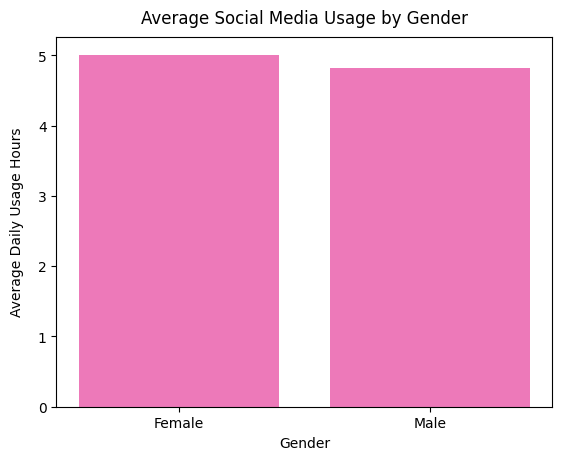

In [28]:
# Group by Gender and compute the average usage
grouped = df.groupby("Gender")["Avg_Daily_Usage_Hours"].mean()

# Plot
plt.bar(grouped.index, grouped.values, color="#ed79b9")
plt.title("Average Social Media Usage by Gender", pad=10)
plt.xlabel("Gender")
plt.ylabel("Average Daily Usage Hours", labelpad=10)
plt.show()


# Females have higher average daily social media usage than males.

### What Platforms Are Both Genders Using That Contribute to High Social Media Usage?

We will use a bar chart to visualize how different platforms (**categorical**) contribute to total usage hours (**quantitative**) among genders.


In [6]:
# For each platform, count how many females and males selected it.
counts = pd.crosstab(df["Most_Used_Platform"], df["Gender"])
counts

Gender,Female,Male
Most_Used_Platform,,
Facebook,24,99
Instagram,172,77
KakaoTalk,12,0
LINE,12,0
LinkedIn,8,13
Snapchat,8,5
TikTok,86,68
Twitter,16,14
VKontakte,0,12


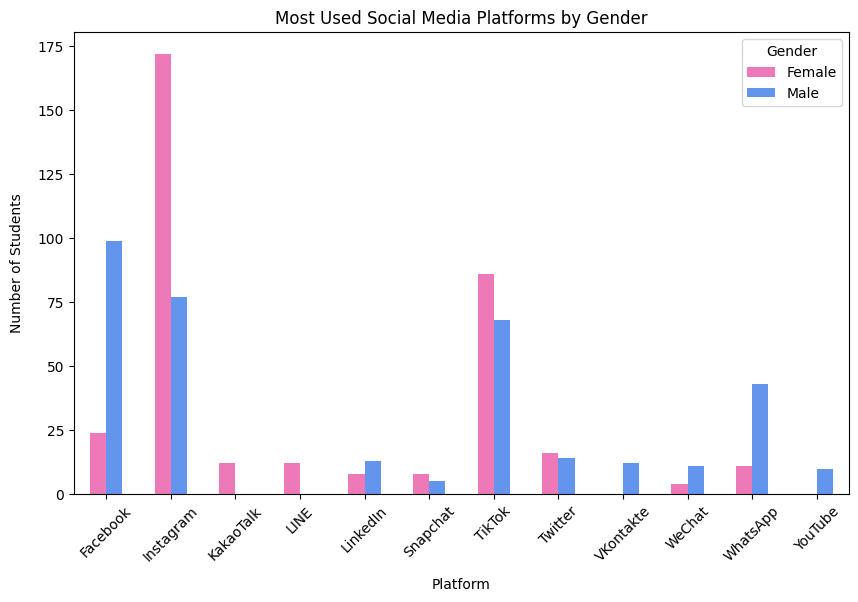

In [7]:
# Making a barchart to make the data easier to see

counts.plot(kind="bar", figsize=(10,6), color=["#ed79b9", "#6495ED"])

plt.title("Most Used Social Media Platforms by Gender")
plt.xlabel("Platform", labelpad=10)
plt.ylabel("Number of Students", labelpad=10)
plt.xticks(rotation=45)
plt.legend(title="Gender")

plt.show()

# Females use Instagram and TikTok the most, which helps explain why they spend more time on social media overall.

### Which Gender is Getting Less Sleep Because of Social Media Use?

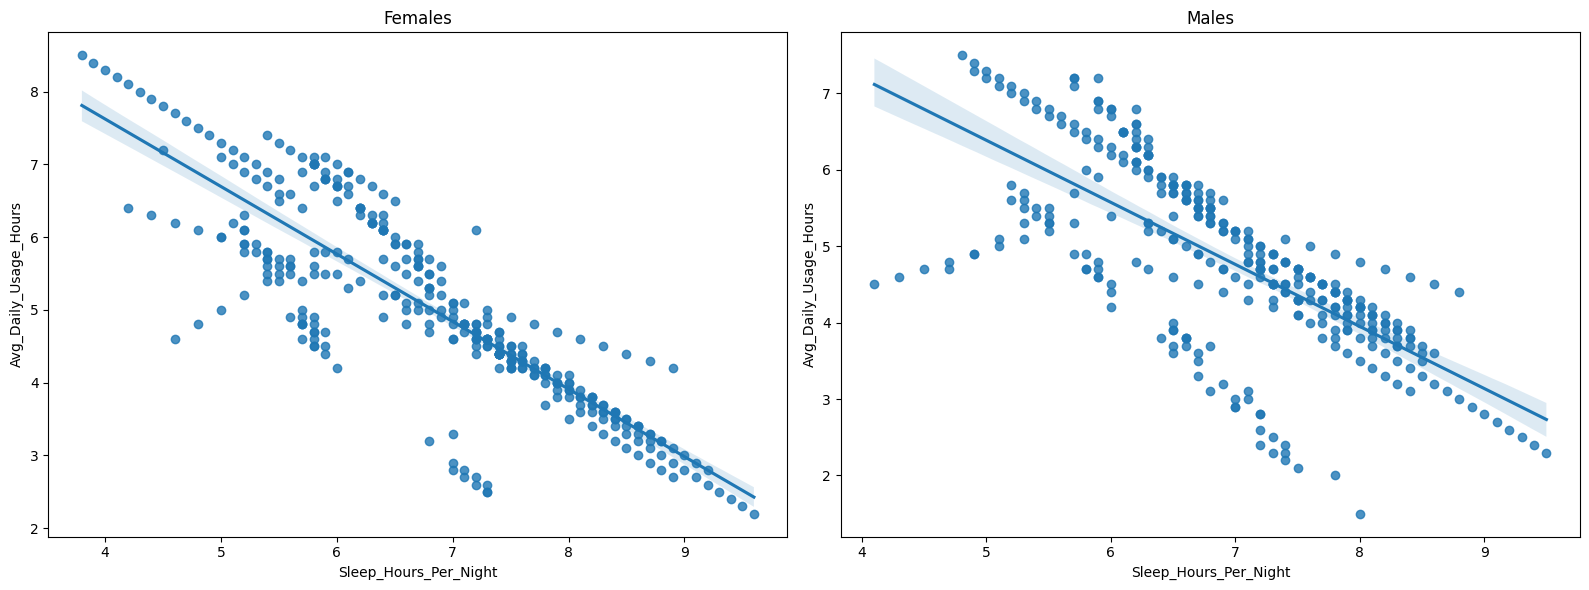

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Females
sns.regplot(
    data=female_df,
    x="Sleep_Hours_Per_Night",
    y="Avg_Daily_Usage_Hours",
    ax=axes[0]
)
axes[0].set_title("Females")

# Males
sns.regplot(
    data=male_df,
    x="Sleep_Hours_Per_Night",
    y="Avg_Daily_Usage_Hours",
    ax=axes[1]
)
axes[1].set_title("Males")

plt.tight_layout()
plt.show()


The scatterplots above display the relationship between **Sleep Hours Per Night** and **Average Daily Social Media Usage Hours** for females and males separately. 

**Overall Observation:**  
Both scatterplots show a **negative linear relationship** between sleep hours and social media usage. This means that as individuals get less sleep, their average daily social media usage tends to increase. 

**Conclusion:**  
Based on this visual evidence, females tend to get less sleep overall and therefore may be using social media more frequently. 

**Next Step:**  
- Calculate the **correlation coefficients** separately for each gender to measure the strength of the relationship.

In [22]:
# Correlation for females

female_corr = female_df["Sleep_Hours_Per_Night"].corr(female_df["Avg_Daily_Usage_Hours"])
print(f"The correlation for females is: {female_corr:.2f}")

The correlation for females is: -0.85


In [23]:
# Correlation for males

male_corr = male_df["Sleep_Hours_Per_Night"].corr(male_df["Avg_Daily_Usage_Hours"])
print(f"The correlation for males is: {male_corr:.2f}")

The correlation for males is: -0.71


#### Correlation Analysis

A strong negative correlation is between **-0.7 and -1.0**.

- **Females:** -0.85 (strong negative)
- **Males:** -0.71 (strong negative)

**Conclusion:**  
Less sleep is linked to more social media use in both groups.
